In [1]:
import pybedtools as pbt
import pysam
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import altair as alt
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [3]:
import os.path as op

In [4]:
import seaborn as sns

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
import splanl.junction_scorer as jn
import splanl.merge_bcs as mbcs
import splanl.coords as cds
import splanl.plots as sp
import splanl.score_motifs as sm
import splanl.inspect_variants as iv
import splanl.post_processing as pp

In [7]:
isos_in = '/nfs/kitzman2/smithcat/proj/campersplice/pouf1_data/'

In [8]:
isos_df = pd.read_table(isos_in+'pou1f1_isoforms_2020-0827.txt')

In [9]:
isos_df = isos_df.set_index('isonum')

In [10]:
bdout = '/nfs/kitzman2/smithcat/proj/campersplice/pouf1_data/og_samples/'

In [11]:
bdrna='/nfs/kitzman2/smithcat/proj/campersplice/gmap_align/2020-0827/edited/'

In [12]:
lfn_rna = !ls {bdrna}*fixed*_edited.bam

In [13]:
lfn_rna

['/nfs/kitzman2/smithcat/proj/campersplice/gmap_align/2020-0827/edited/mxm_POU1F1_cDNA_pool_rep1_alt_fixed_bc_filt_edited.bam',
 '/nfs/kitzman2/smithcat/proj/campersplice/gmap_align/2020-0827/edited/mxm_POU1F1_cDNA_pool_rep1_fixed_bc_filt_edited.bam',
 '/nfs/kitzman2/smithcat/proj/campersplice/gmap_align/2020-0827/edited/mxm_POU1F1_cDNA_pool_rep2_fixed_bc_filt_edited.bam',
 '/nfs/kitzman2/smithcat/proj/campersplice/gmap_align/2020-0827/edited/mxm_POU1F1_cDNA_pool_rep3_fixed_bc_filt_edited.bam']

In [14]:
msamp_fn = { op.split(fn)[-1].replace('_bc_filt_edited.bam','').replace('mxm_POU1F1_cDNA_','') : fn
             for fn in lfn_rna }

In [15]:
msamp_fn

{'pool_rep1_alt_fixed': '/nfs/kitzman2/smithcat/proj/campersplice/gmap_align/2020-0827/edited/mxm_POU1F1_cDNA_pool_rep1_alt_fixed_bc_filt_edited.bam',
 'pool_rep1_fixed': '/nfs/kitzman2/smithcat/proj/campersplice/gmap_align/2020-0827/edited/mxm_POU1F1_cDNA_pool_rep1_fixed_bc_filt_edited.bam',
 'pool_rep2_fixed': '/nfs/kitzman2/smithcat/proj/campersplice/gmap_align/2020-0827/edited/mxm_POU1F1_cDNA_pool_rep2_fixed_bc_filt_edited.bam',
 'pool_rep3_fixed': '/nfs/kitzman2/smithcat/proj/campersplice/gmap_align/2020-0827/edited/mxm_POU1F1_cDNA_pool_rep3_fixed_bc_filt_edited.bam'}

In [16]:
isogrpdict = { samp: jn.create_iso_dict_no_cnst(isos_df.query('og_'+samp+'_filter!=0'))
              for samp in msamp_fn }

In [17]:
isogrpdict['pool_rep1_alt_fixed']

{'iso0056': ((1150, 1254),),
 'iso0093': ((1173, 1260),),
 'iso0099': ((1195, 1272), (1440, 1464)),
 'iso0121': ((1158, 1262),),
 'iso0174': ((1248, 1272),),
 'iso0209': ((1201, 1209), (1211, 1272)),
 'iso0267': ((1187, 1272), (1440, 1457)),
 'iso0283': ((1191, 1272),),
 'iso0308': ((1156, 1258),),
 'iso0401': ((1149, 1252),),
 'iso0505': ((1184, 1272),),
 'iso0540': ((1180, 1272),),
 'iso0555': ((1201, 1272), (1440, 1470)),
 'iso0569': ((1201, 1272), (1440, 1465)),
 'iso0628': ((1143, 1246),),
 'iso0701': ((1164, 1267),),
 'iso0715': ((1169, 1269),),
 'iso0737': ((1169, 1271),),
 'iso0931': ((1201, 1268),),
 'iso0963': ((1195, 1272),),
 'iso0984': ((1186, 1272), (1440, 1455)),
 'iso1096': ((1191, 1272), (1440, 1462)),
 'iso1396': ((1110, 1212),),
 'iso1482': ((1142, 1244),),
 'iso1585': ((1180, 1274),),
 'iso1621': ((1182, 1272),),
 'iso1679': ((1123, 1223),),
 'iso1699': ((1145, 1247),),
 'iso1711': ((1158, 1259),),
 'iso1737': ((1207, 1272), (1440, 1476)),
 'iso1754': ((1159, 1259),

In [18]:
len(isogrpdict['pool_rep1_alt_fixed'])

129

In [19]:
satbl = pd.read_csv( '/nfs/kitzman2/jacob/proj/campersplice/pou1f1_subassembly_deep_20190917/pou1f1_subasm_joined_191011.tsv' ,
                    sep='\t' )

satbl = satbl.set_index('readgroupid')

In [20]:
satbl = satbl.drop( columns=[ col for col in satbl.columns if 'nbp' in col ] )

In [21]:
msamp_rnabam = { samp: pysam.AlignmentFile(msamp_fn[samp],'rb') for samp in msamp_fn }

In [22]:
%%time
#3.75 min
msamp_bcrnatbl = {samp: jn.compute_isoform_counts(msamp_rnabam[samp],
                                           isogrpdict[samp],
                                           [(649,696),(3500,3655)])
                  for samp in msamp_rnabam}

processed 1000 bcs, 9119 reads
processed 2000 bcs, 18023 reads
processed 3000 bcs, 27389 reads
processed 4000 bcs, 36680 reads
processed 5000 bcs, 44589 reads
processed 6000 bcs, 53917 reads
processed 7000 bcs, 64232 reads
processed 8000 bcs, 72738 reads
processed 9000 bcs, 81967 reads
processed 10000 bcs, 92839 reads
processed 11000 bcs, 102721 reads
processed 12000 bcs, 113309 reads
processed 13000 bcs, 124134 reads
processed 14000 bcs, 134000 reads
processed 15000 bcs, 143324 reads
processed 16000 bcs, 152403 reads
processed 17000 bcs, 161574 reads
processed 18000 bcs, 170666 reads
processed 19000 bcs, 179034 reads
processed 20000 bcs, 186723 reads
processed 21000 bcs, 195570 reads
processed 22000 bcs, 204003 reads
processed 23000 bcs, 213286 reads
processed 24000 bcs, 221668 reads
processed 25000 bcs, 228513 reads
processed 26000 bcs, 237725 reads
processed 27000 bcs, 246386 reads
processed 28000 bcs, 255136 reads
processed 29000 bcs, 263761 reads
processed 30000 bcs, 273766 reads


processed 86000 bcs, 1482872 reads
processed 87000 bcs, 1503898 reads
processed 88000 bcs, 1525305 reads
processed 89000 bcs, 1545169 reads
processed 90000 bcs, 1566658 reads
processed 91000 bcs, 1585264 reads
processed 92000 bcs, 1606311 reads
processed 93000 bcs, 1624719 reads
processed 94000 bcs, 1643269 reads
processed 95000 bcs, 1661340 reads
processed 96000 bcs, 1679853 reads
processed 97000 bcs, 1698560 reads
processed 98000 bcs, 1717622 reads
processed 99000 bcs, 1734153 reads
processed 100000 bcs, 1750637 reads
processed 101000 bcs, 1765966 reads
processed 102000 bcs, 1783563 reads
processed 103000 bcs, 1802426 reads
processed 104000 bcs, 1821020 reads
processed 105000 bcs, 1838953 reads
processed 106000 bcs, 1852548 reads
processed 107000 bcs, 1868233 reads
processed 108000 bcs, 1879717 reads
processed 109000 bcs, 1897346 reads
processed 110000 bcs, 1914980 reads
processed 111000 bcs, 1932799 reads
processed 112000 bcs, 1948634 reads
processed 113000 bcs, 1963843 reads
proces

processed 143000 bcs, 2397178 reads
processed 144000 bcs, 2414348 reads
processed 145000 bcs, 2430394 reads
processed 146000 bcs, 2447163 reads
processed 147000 bcs, 2463288 reads
processed 148000 bcs, 2479424 reads
processed 149000 bcs, 2496528 reads
processed 150000 bcs, 2515122 reads
processed 151000 bcs, 2531836 reads
processed 152000 bcs, 2548430 reads
processed 153000 bcs, 2562774 reads
processed 154000 bcs, 2579709 reads
processed 155000 bcs, 2595882 reads
processed 156000 bcs, 2613441 reads
processed 157000 bcs, 2629991 reads
processed 158000 bcs, 2641477 reads
processed 159000 bcs, 2656032 reads
processed 160000 bcs, 2666151 reads
processed 161000 bcs, 2681505 reads
processed 162000 bcs, 2696851 reads
processed 163000 bcs, 2714789 reads
processed 164000 bcs, 2731048 reads
processed 165000 bcs, 2744420 reads
processed 166000 bcs, 2757947 reads
processed 167000 bcs, 2775885 reads
processed 168000 bcs, 2791902 reads
processed 169000 bcs, 2809202 reads
processed 170000 bcs, 282424

In [23]:
msamp_bcrnatbl_flen = {samp: jn.filter_on_barc_len( msamp_bcrnatbl[samp], 30 )
                       for samp in msamp_bcrnatbl}

In [24]:
msamp_bcrnatbl['pool_rep1_alt_fixed'].head()

,num_reads,unmapped_reads,bad_starts,bad_ends,soft_clipped,other_isoform,iso0056,iso0093,iso0099,iso0121,...,iso6629,iso6654,iso6670,iso6687,iso6743,iso6816,iso6828,iso6831,iso6840,usable_reads
barcode,,,,,,,,,,,,,,,,,,,,,
AAAAAAAACTGCGAGACGTCTGG,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
AAAAAACCTGCGCGACCCCCTGG,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
AAAAAACTGTGTGGCCATACTGG,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
AAAAAACTTGCCCTCTATTGTGG,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
AAAAAAGACGGGGGGGCTGCTGG,27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,27


pool_rep1_alt_fixed


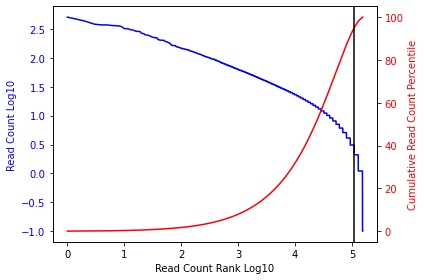

The read count cut off at the 95 th percentile is 3
pool_rep1_fixed


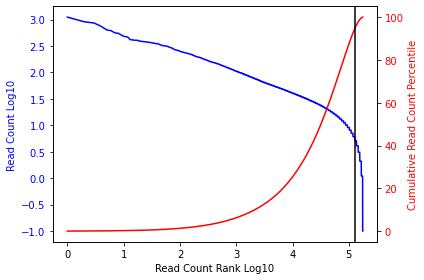

The read count cut off at the 95 th percentile is 5
pool_rep2_fixed


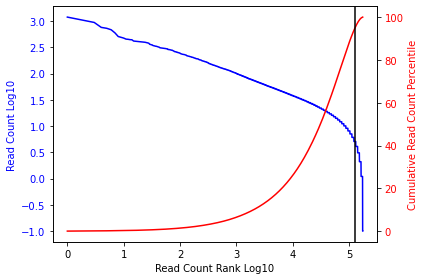

The read count cut off at the 95 th percentile is 5
pool_rep3_fixed


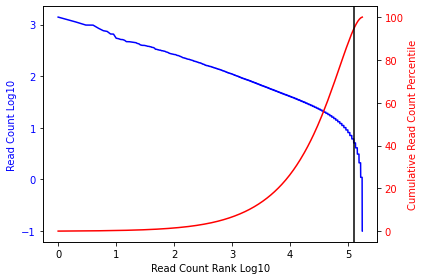

The read count cut off at the 95 th percentile is 5


In [25]:
for samp in msamp_bcrnatbl_flen:
    print(samp)
    sp.waterfall_plot(msamp_bcrnatbl_flen[samp],
              'usable_reads',
               95)

In [26]:
cut_list = [3,5,5,5]
cut_dict = { samp: cut_list[i] for i,samp in enumerate( msamp_bcrnatbl_flen ) }

In [27]:
msamp_varbcrnatbl_flen_allisos = {samp: mbcs.merge_subasm_and_rna_tbls(satbl,
                                                                    msamp_bcrnatbl_flen[samp])
                                 for samp in msamp_bcrnatbl_flen}

In [28]:
msamp_varbcrnatbl_flen_allisos['pool_rep1_alt_fixed'].head()

,passes,refname,status,n_variants_passing,variant_list,max_altAF,second_altAF,max_altRD,second_altRD,reads_in,...,iso6629,iso6654,iso6670,iso6687,iso6743,iso6816,iso6828,iso6831,iso6840,usable_reads
GTTGCCTATAGTGTCTTTTGTGG,True,pspl3_pou1f1_bc,pass,1,pspl3_pou1f1_bc:1376:C:T,0.589147,-1.0,76,-1,1000,...,0,0,0,0,0,0,0,0,0,23
GTTGCCTCCGGCGGTTTAGATGG,True,pspl3_pou1f1_bc,pass,1,pspl3_pou1f1_bc:1318:A:T,0.648649,-1.0,48,-1,459,...,0,0,0,0,0,0,0,0,0,2
GTTGCCTGCAGGATCAATTTTGG,True,pspl3_pou1f1_bc,pass,1,pspl3_pou1f1_bc:1382:T:A,0.544715,-1.0,67,-1,1000,...,0,0,0,0,0,0,0,0,0,1
GTTGCCTGTCTTTTTCGTCTTGG,True,pspl3_pou1f1_bc,pass,1,pspl3_pou1f1_bc:1325:T:A,0.655738,-1.0,40,-1,458,...,0,0,0,0,0,0,0,0,0,2
GTTGCCTTCGTTACGGTTCGTGG,True,pspl3_pou1f1_bc,pass,1,pspl3_pou1f1_bc:1387:A:T,0.489933,-1.0,73,-1,1000,...,0,0,0,0,0,0,0,0,0,42


In [29]:
%%time
for samp in msamp_varbcrnatbl_flen_allisos:
    msamp_varbcrnatbl_flen_allisos[samp].to_csv(
                                bdout+samp+'_og_pou1f1_by_bc_effects_allvars_allisos-20200827.txt',
                                sep='\t'
                                )

CPU times: user 15.5 s, sys: 204 ms, total: 15.7 s
Wall time: 20.9 s


In [30]:
isonamedict = {'ALPHA':[(1201,1272)],
              'BETA':[(1123, 1225)],
              'SKIP':[]}

In [31]:
namedisogrps = {samp: jn.create_named_isogrps(isogrpdict[samp],
                                            isonamedict,
                                            [(1439,1538)],
                                            47,
                                            150,
                                            3)
                for samp in isogrpdict}

In [32]:
msamp_bcrnatbl_flen_rename = {samp: jn.combine_isogrps( namedisogrps[samp],
                                                        msamp_bcrnatbl_flen[samp] ) 
                              for samp in namedisogrps}

In [33]:
msamp_varbcrnatbl_flen_rename = {samp: mbcs.merge_subasm_and_rna_tbls(satbl,
                                                                    msamp_bcrnatbl_flen_rename[samp])
                                 for samp in msamp_bcrnatbl_flen_rename}

In [34]:
%%time
bybcvartbl_long = mbcs.combine_rep_perbctbls_long( [ msamp_varbcrnatbl_flen_rename[samp] for samp in msamp_varbcrnatbl_flen_rename ],
                                                              [ samp for samp in msamp_varbcrnatbl_flen_rename ] )

CPU times: user 345 ms, sys: 163 ms, total: 508 ms
Wall time: 507 ms


In [35]:
bybcvartbl_long.to_csv(
                                bdout+'og_pou1f1_by_bc_effects_allvars-20200827.txt',
                                sep='\t'
                                )

In [36]:
%%time
msamp_byvartbl_allisos = {samp: mbcs.summarize_byvar_singlevaronly(satbl,
                                                            msamp_bcrnatbl_flen[samp],
                                                            [(1123,1272)],
                                                            cut_dict[samp] )
                          for samp in msamp_bcrnatbl}

CPU times: user 4min 45s, sys: 1.66 s, total: 4min 46s
Wall time: 4min 46s


In [37]:
msamp_byvartbl_allisos_snvs = {samp: mbcs.filter_byvartbl_snvonly( msamp_byvartbl_allisos[samp] )
                              for samp in msamp_byvartbl_allisos}

In [38]:
msamp_byvartbl_allisos_snvs['pool_rep1_alt_fixed'].head()

,varlist,chrom,pos,ref,alt,n_bc,n_bc_passfilt,sum_reads,sum_reads_passfilt,sum_usable_reads,...,median_iso6840,n_bc_sa,per_bc_passfilt,per_reads_passfilt,per_reads_usable,per_unmapped,per_badend,per_badstart,per_softclipped,per_otheriso
0,pspl3_pou1f1_bc:1044:G:A,pspl3_pou1f1_bc,1044,G,A,173,97,1335,1187,1064,...,0.0,207,56.069364,88.913858,89.637742,0.0,9.351306,0.0,0.336984,0.673968
1,pspl3_pou1f1_bc:1044:G:C,pspl3_pou1f1_bc,1044,G,C,171,104,1654,1528,1420,...,0.0,212,60.818713,92.382104,92.931937,0.0,6.544503,0.0,0.261780,0.261780
2,pspl3_pou1f1_bc:1044:G:T,pspl3_pou1f1_bc,1044,G,T,121,81,1312,1222,1099,...,0.0,137,66.942149,93.140244,89.934534,0.0,8.674304,0.0,0.245499,1.145663
3,pspl3_pou1f1_bc:1045:T:A,pspl3_pou1f1_bc,1045,T,A,92,67,1167,1110,992,...,0.0,105,72.826087,95.115681,89.369369,0.0,7.657658,0.0,1.711712,1.261261
4,pspl3_pou1f1_bc:1045:T:C,pspl3_pou1f1_bc,1045,T,C,136,90,1233,1139,1037,...,0.0,160,66.176471,92.376318,91.044776,0.0,7.287094,0.0,0.263389,1.404741


In [39]:
for samp in msamp_byvartbl_allisos_snvs:

    msamp_byvartbl_allisos_snvs[samp]['hgvs_pos'] = cds.pos_to_hgvspos( msamp_byvartbl_allisos_snvs[samp]['pos'],
                                                                           (1038,1450),
                                                                           [(1123,1272),],
                                                                           [(143,292),]
                                                                         )

In [40]:
byvartbl_allisos_long = mbcs.combine_allisos_pervartbls_long( [ msamp_byvartbl_allisos_snvs[samp] for samp in msamp_byvartbl_allisos_snvs ],
                                                              [ samp for samp in msamp_byvartbl_allisos_snvs ] )

In [41]:
byvartbl_allisos_long.to_csv(
                                bdout+'og_pou1f1_by_var_effects_allisos_snvs-20200827.txt',
                                sep='\t',
                                index=False
                                )

In [42]:
%%time
msamp_byvartbl = { samp: mbcs.summarize_byvar_singlevaronly(satbl,
                                                            msamp_bcrnatbl_flen_rename[samp],
                                                            [(1123,1272)],
                                                            cut_dict[samp],
                                                            ['ALPHA', 'BETA', 'SKIP', 'OTHER'] )
                          for samp in msamp_bcrnatbl_flen_rename }

CPU times: user 15.3 s, sys: 42.9 ms, total: 15.3 s
Wall time: 15.3 s


In [43]:
msamp_bcrnatbl_flen_rename['pool_rep1_fixed'].head()

,num_reads,unmapped_reads,bad_starts,bad_ends,soft_clipped,other_isoform,usable_reads,ALPHA,BETA,SKIP,OTHER,ALPHA_psi,BETA_psi,SKIP_psi,OTHER_psi
barcode,,,,,,,,,,,,,,,
AAAAAAAACTGCGAGACGTCTGG,11,0,0,2,0,0,9,7,1,1,0,0.777778,0.111111,0.111111,0.000000
AAAAAACCTGCGCGACCCCCTGG,4,0,0,1,0,0,3,2,0,1,0,0.666667,0.000000,0.333333,0.000000
AAAAAACTGTGTGGCCATACTGG,1,0,0,0,0,0,1,1,0,0,0,1.000000,0.000000,0.000000,0.000000
AAAAAACTTGCCCTCTATTGTGG,6,0,0,0,0,0,6,5,0,1,0,0.833333,0.000000,0.166667,0.000000
AAAAAAGACGGGGGGGCTGCTGG,16,0,0,1,0,0,15,10,0,3,2,0.666667,0.000000,0.200000,0.133333


In [44]:
msamp_byvartbl_snvs = { samp: mbcs.filter_byvartbl_snvonly( msamp_byvartbl[samp] )
                              for samp in msamp_byvartbl }

In [45]:
for samp in msamp_byvartbl_snvs:

    msamp_byvartbl_snvs[samp]['hgvs_pos'] = cds.pos_to_hgvspos( msamp_byvartbl_snvs[samp]['pos'],
                                                                   (1038,1450),
                                                                   [(1123,1272),],
                                                                   [(143,292),]
                                                                 )

In [46]:
byvartbl_long = mbcs.combine_rep_pervartbls_long( [msamp_byvartbl_snvs[samp] for samp in msamp_byvartbl_snvs],
                                                [samp for samp in msamp_byvartbl_snvs])

In [47]:
byvartbl_long['wmean_ALPHA_inv'] = 1 - byvartbl_long.wmean_ALPHA

In [48]:
byvartbl_long = pp.stdize_cols_by_sample( byvartbl_long,
                                            [ 'wmean_'+col for col in ['ALPHA', 'BETA', 'SKIP', 'OTHER', 'ALPHA_inv'] ] )

In [49]:
fasta_file = '/nfs/kitzman2/jacob/proj/campersplice/refs/pspl3_pou1f1_bc.fa'

In [50]:
refseq = pp.get_refseq( fasta_file )[0]

In [51]:
byvartbl_long = pp.acceptors_donors( refseq,
                                    byvartbl_long,
                                    'zwmean_OTHER',
                                    1.5 )

In [52]:
byvartbl_long = pp.sdvs( byvartbl_long,
                        'zwmean_ALPHA_inv',
                                    1.5 )

In [53]:
byvartbl_long = pp.extract_var_type( byvartbl_long,
                                      refseq, 
                                      ( 1123, 1272 ),
                                      2 )

In [ ]:
###  Original patient mutations
#  S50A = c.148 T>G = 1128
#  S50S = c.150 T>G = 1130
#  I51S = c.152 T>G = 1132
#  L52W = c.155 T>G = 1135
#  S53A = c.157 T>G = 1137

In [62]:
byvartbl_long.query( 'pos == 1128' )['gd']

,pos,alt,chrom,ref,varlist,sample,n_bc,n_bc_passfilt,sum_reads,sum_reads_passfilt,...,psbl_snv_acc,psbl_snv_don,snv_acc,snv_don,sdv,ref_aa,alt_aa,var_type,sdv_exon,sdv_intron
976,1128,A,pspl3_pou1f1_bc,T,pspl3_pou1f1_bc:1128:T:A,pool_rep1_fixed,202.0,153.0,3139.0,2973.0,...,False,False,False,False,False,S,T,Missense,False,False
977,1128,A,pspl3_pou1f1_bc,T,pspl3_pou1f1_bc:1128:T:A,pool_rep3_fixed,201.0,142.0,3316.0,3081.0,...,False,False,False,False,False,S,T,Missense,False,False
978,1128,A,pspl3_pou1f1_bc,T,pspl3_pou1f1_bc:1128:T:A,pool_rep2_fixed,200.0,142.0,3012.0,2820.0,...,False,False,False,False,False,S,T,Missense,False,False
979,1128,A,pspl3_pou1f1_bc,T,pspl3_pou1f1_bc:1128:T:A,pool_rep1_alt_fixed,165.0,100.0,1312.0,1181.0,...,False,False,False,False,False,S,T,Missense,False,False
980,1128,C,pspl3_pou1f1_bc,T,pspl3_pou1f1_bc:1128:T:C,pool_rep2_fixed,282.0,178.0,3462.0,3071.0,...,False,False,False,False,False,S,P,Missense,False,False
981,1128,C,pspl3_pou1f1_bc,T,pspl3_pou1f1_bc:1128:T:C,pool_rep3_fixed,284.0,182.0,3335.0,3014.0,...,False,False,False,False,False,S,P,Missense,False,False
982,1128,C,pspl3_pou1f1_bc,T,pspl3_pou1f1_bc:1128:T:C,pool_rep1_fixed,281.0,184.0,3370.0,3050.0,...,False,False,False,False,False,S,P,Missense,False,False
983,1128,C,pspl3_pou1f1_bc,T,pspl3_pou1f1_bc:1128:T:C,pool_rep1_alt_fixed,251.0,137.0,1722.0,1492.0,...,False,False,False,False,False,S,P,Missense,False,False
984,1128,G,pspl3_pou1f1_bc,T,pspl3_pou1f1_bc:1128:T:G,pool_rep2_fixed,170.0,70.0,1216.0,890.0,...,True,False,False,False,True,S,A,Missense,True,False
985,1128,G,pspl3_pou1f1_bc,T,pspl3_pou1f1_bc:1128:T:G,pool_rep1_fixed,170.0,63.0,1037.0,753.0,...,True,False,False,False,True,S,A,Missense,True,False


In [54]:
byvartbl_long = pp.sdv_by_var_type( byvartbl_long )

In [55]:
byvartbl_long.head()

,pos,alt,chrom,ref,varlist,sample,n_bc,n_bc_passfilt,sum_reads,sum_reads_passfilt,...,psbl_snv_acc,psbl_snv_don,snv_acc,snv_don,sdv,ref_aa,alt_aa,var_type,sdv_exon,sdv_intron
0,1044,A,pspl3_pou1f1_bc,G,pspl3_pou1f1_bc:1044:G:A,pool_rep1_alt_fixed,173.0,97.0,1335.0,1187.0,...,False,False,False,False,False,NaN,NaN,Intronic,False,False
1,1044,A,pspl3_pou1f1_bc,G,pspl3_pou1f1_bc:1044:G:A,pool_rep2_fixed,192.0,128.0,2940.0,2726.0,...,False,False,False,False,False,NaN,NaN,Intronic,False,False
2,1044,A,pspl3_pou1f1_bc,G,pspl3_pou1f1_bc:1044:G:A,pool_rep3_fixed,191.0,141.0,3127.0,2952.0,...,False,False,False,False,False,NaN,NaN,Intronic,False,False
3,1044,A,pspl3_pou1f1_bc,G,pspl3_pou1f1_bc:1044:G:A,pool_rep1_fixed,190.0,137.0,3174.0,2976.0,...,False,False,False,False,False,NaN,NaN,Intronic,False,False
4,1044,C,pspl3_pou1f1_bc,G,pspl3_pou1f1_bc:1044:G:C,pool_rep2_fixed,201.0,151.0,3614.0,3440.0,...,False,False,False,False,False,NaN,NaN,Intronic,False,False


In [56]:
byvartbl_long.to_csv(
                    bdout+'og_pou1f1_by_var_effects_snvs-20200827.txt',
                    sep='\t',
                    index=False
                                )